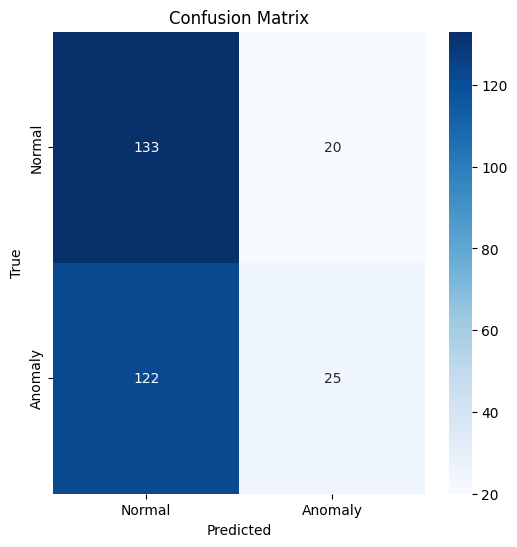

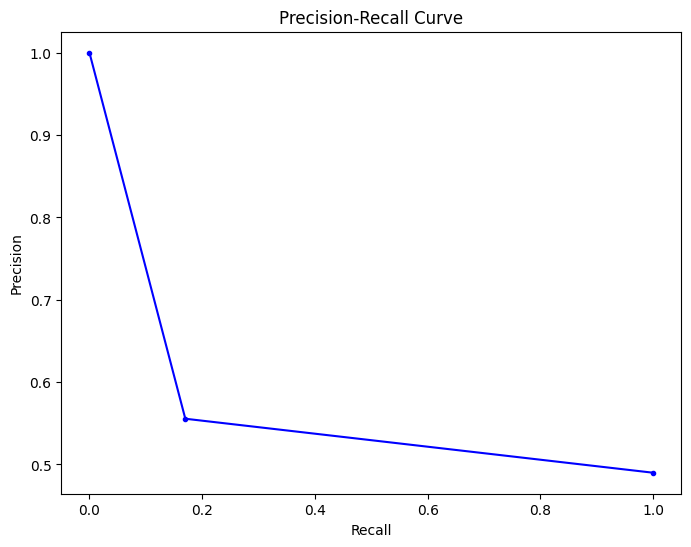

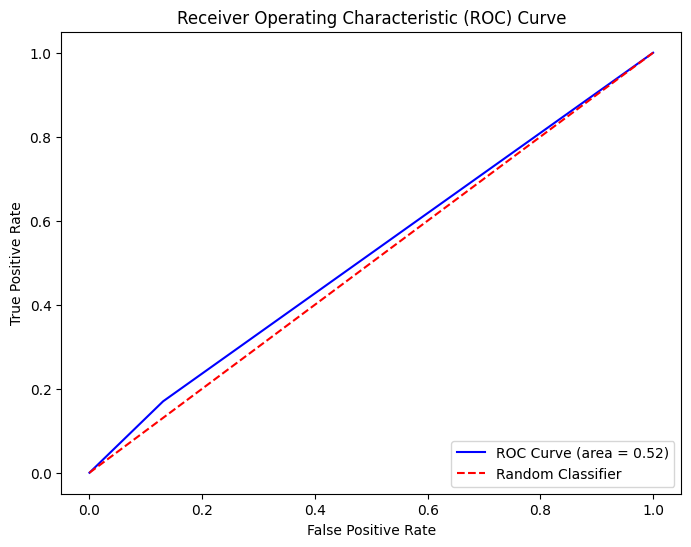

Classification Report:
              precision    recall  f1-score   support

           0       0.52      0.87      0.65       153
           1       0.56      0.17      0.26       147

    accuracy                           0.53       300
   macro avg       0.54      0.52      0.46       300
weighted avg       0.54      0.53      0.46       300

False Positives: 20
False Negatives: 122


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import IsolationForest
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve, roc_curve, auc

# Step 1: Load the dataset (replace with your dataset)
# Example: Load dataset with features X and target y
df = pd.read_csv('Featured_dataset.csv')
# X = df.drop(columns=['target'])
# y = df['target']

# For illustration, let's create some synthetic data (you should use your own data)
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=1000, n_features=20, n_informative=10, n_classes=2, random_state=42)

# Step 2: Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 3: Train the anomaly detection model
# Using IsolationForest as an example model
model = IsolationForest(contamination=0.1, random_state=42)
model.fit(X_train)

# Step 4: Make predictions on the test set
y_pred = model.predict(X_test)

# The model predicts -1 for anomalies and 1 for normal, but we want 0 for normal and 1 for anomalies
y_pred = np.where(y_pred == -1, 1, 0)

# Step 5: Compute the confusion matrix and other evaluation metrics
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Step 6: Visualize the confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Anomaly'], yticklabels=['Normal', 'Anomaly'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Step 7: Visualize Precision-Recall and ROC Curves
# Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_test, y_pred)
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.', color='b', label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='b', label=f'ROC Curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='r', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Step 8: Show the classification report for precision, recall, f1-score
print("Classification Report:")
print(report)

# Step 9: Analyze the error trends (False Positives and False Negatives)
# Calculate the errors
false_positives = conf_matrix[0, 1]  # Normal predicted as Anomaly
false_negatives = conf_matrix[1, 0]  # Anomaly predicted as Normal

print(f"False Positives: {false_positives}")
print(f"False Negatives: {false_negatives}")

# Step 10: Optional: If you have more sophisticated error analysis, plot error distributions or trend graphs
